In [1]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import diffprivlib.models as dpm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") #warnings.filterwarnings("default")



# Load data

In [2]:
trump_data = pd.read_csv('../data/2016-cces-trump.csv')

# Visualize data


In [3]:
trump_data

,uid,stateabb,inputstate,race,angryracism,whiteadv,fearraces,racerare,acograc,aemprac,...,se_lrelig,z_acograc,z_aemprac,z_lcograc,z_lemprac,z_pid7na,z_lrelig,z_ideo,z_famincr,z_age
0,1,NH,33,1,2.0,3.0,1.0,3.0,3.0,1.5,...,0.246291,0.230760,-0.271252,0.295012,-0.146684,0.338328,-0.102495,-0.001742,NaN,-0.026144
1,2,LA,22,1,1.0,4.0,1.0,1.0,2.5,1.0,...,NaN,0.010444,-0.592603,-0.115771,-0.654787,0.103767,NaN,-0.001742,-0.044765,-0.768742
2,3,MO,29,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.278047,NaN,NaN,NaN,NaN,-0.599915,0.306842,0.920136,-0.354468,0.122376
3,4,AL,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.234668,NaN,NaN,NaN,NaN,0.103767,0.037493,0.459197,-0.819021,-0.590518
4,5,CO,8,1,2.0,1.0,1.0,1.0,1.0,1.5,...,0.321913,-0.650504,-0.271252,-0.746858,-0.146684,-0.365354,-0.604388,-0.462680,0.110086,-0.412295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64595,64596,NY,36,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.575410,NaN,NaN,NaN,NaN,-0.365354,0.908217,0.459197,-0.199617,-0.649926
64596,64597,CO,8,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.237046,NaN,NaN,NaN,NaN,0.103767,-0.053592,NaN,-0.354468,-0.531110
64597,64598,LA,22,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.245402,NaN,NaN,NaN,NaN,-0.130794,-0.090021,0.920136,-0.819021,-0.293479
64598,64599,RI,44,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.509297,NaN,NaN,NaN,NaN,-0.365354,-0.847906,-0.462680,-0.199617,-0.560814


### TODO: Figure out what to do about the NaNs. For now, replacing with N(0,1) noise

# Cleaning data

In [4]:
trump_data = trump_data.dropna(subset=['votetrump'])
trump_data.fillna(0, inplace = True)

/var/folders/vm/gjdh9ms940q920kn3kg5cdsc0000gn/T/ipykernel_41576/95265725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_data.fillna(0, inplace = True)


In [5]:
for col in trump_data.columns:
    values = [v for v in trump_data[col].values if v!=np.nan]

    if isinstance(values[0], str):
        print(str(values[0]))
        map = {v:i for i, v in enumerate(values)}
        trump_data[col].replace(map, inplace=True)

/var/folders/vm/gjdh9ms940q920kn3kg5cdsc0000gn/T/ipykernel_41576/2162484025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_data[col].replace(map, inplace=True)


NH
New Hampshire
Northeast
New England
3: Gen X


In [6]:
vote_cols = [ 'vote' not in col and 'uid' not in col for col in  trump_data.columns ]
vote_cols = [ col for col in  trump_data.columns if  'vote' not in col and 'uid' not in col ]

In [7]:
y = trump_data['votetrump'].to_numpy()
X = trump_data.loc[:,vote_cols].to_numpy()
X = X[:,:5]
# X = preprocessing.normalize(X, norm='l2')

In [8]:
X.shape

(44932, 5)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Baseline Model

In [10]:
pca = PCA(n_components=5)
tX_train = pca.fit_transform(X_train)
tX_test = pca.transform(X_test)

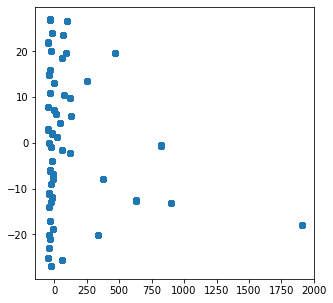

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.scatter(tX_train[:, 0], tX_train[:, 1])

In [12]:
clf = LogisticRegression(random_state = 0, max_iter = 200).fit(tX_train, y_train)

In [13]:
print(f"Performance on training data {clf.score(tX_train, y_train)}")
print(f"Performance on test data {clf.score(tX_test, y_test)}")

opt_accuracy = clf.score(tX_test, y_test)

Performance on training data 0.7983916436689517
Performance on test data 0.8012997418321018


# PCA => DP Logistic Regression

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/logistic_regression.py:221: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/logistic_regression.py:221: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs

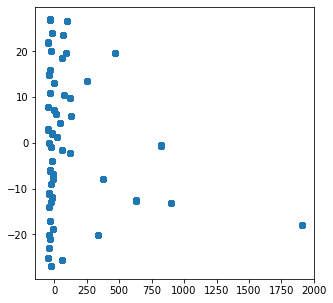

In [14]:
pca = PCA(n_components=5)
tX_train = pca.fit_transform(X_train)
tX_test = pca.transform(X_test)
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.scatter(tX_train[:, 0], tX_train[:, 1])
epsilons = np.logspace(-2, 2, 50)
curves = []
for _ in range(20):
    accuracy = []
    for epsilon in epsilons:
        dp_clf = dpm.LogisticRegression(epsilon=epsilon, max_iter = 200).fit(tX_train, y_train, )
        accuracy.append(dp_clf.score(tX_test, y_test))

    curves += [accuracy]


In [15]:
mean_score = np.mean(np.array(curves), axis = 0)

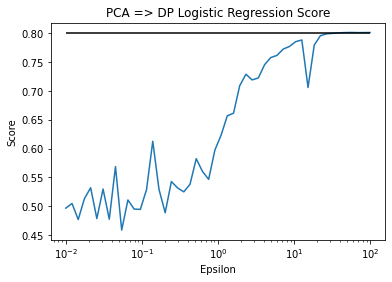

In [16]:
ax = plt.subplot(111)
ax.plot(epsilons, mean_score)
ax.set_title("PCA => DP Logistic Regression Score")
ax.set_xlabel("Epsilon")
ax.set_ylabel("Score")
ax.set_xscale('log')
ax.hlines(opt_accuracy, epsilons[0],epsilons[-1] , color = "black")

# DP PCA => Logistic Regression

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


prob 0.9660590003428295
self._rng.random() 0.07935617213356105
prob 0.9813408182365341
self._rng.random() 0.9588216893860464
prob 0.9899662567320241
self._rng.random() 0.04737871027273988
prob 0.9906713745331664
self._rng.random() 0.9456126093965974


/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.9562408707936236
self._rng.random() 0.22613803627098328
prob 0.9571972463677422
self._rng.random() 0.8216797806347833
prob 0.9572466979874573
self._rng.random() 0.11342932940947703
prob 0.9588913559528349
self._rng.random() 0.6694076295104376
prob 0.9496523532712816
self._rng.random() 0.4186104726247405
prob 0.9497175749028516
self._rng.random() 0.7590054419981717
prob 0.9839306567097352
self._rng.random() 0.7658050321846506
prob 0.9969678949810253
self._rng.random() 0.597868596383444


/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.9370607781986643
self._rng.random() 0.8514636795207157
prob 0.9369441051535734
self._rng.random() 0.34815203989349175
prob 0.9839970088695862
self._rng.random() 0.8126423846442006
prob 0.9866256539181208
self._rng.random() 0.19991202331851676
prob 0.923045753685949
self._rng.random() 0.7101411330444531
prob 0.9451961388061791
self._rng.random() 0.14849596044365598
prob 0.9528874122756583
self._rng.random() 0.03406221636453344
prob 0.9553155346895956
self._rng.random() 0.7764463665996836
prob 0.8943390813014659
self._rng.random() 0.3909694698223859
prob 0.9014405312496541
self._rng.random() 0.5343754206918776
prob 0.9301532066931868
self._rng.random() 0.6007681220555345
prob 0.9873438815695605
self._rng.random() 0.22480812235559833


/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.9057628766422869
self._rng.random() 0.1570239118507576
prob 0.9280953969442243
self._rng.random() 0.4234067762128845
prob 0.9121283846442645
self._rng.random() 0.6884897018511451
prob 0.98432129429759
self._rng.random() 0.3753010614997939
prob 0.9968213974309571
self._rng.random() 0.35329686290514883
prob 0.9999586972327095
self._rng.random() 0.914497752336331
prob 0.8843619277844473
self._rng.random() 0.2088168975413437
prob 0.8840341956225409
self._rng.random() 0.5654429270226092
prob 0.9094249938934951
self._rng.random() 0.5517402685545165
prob 0.9996905705979252
self._rng.random() 0.17282772487153442
prob 0.8577967544796417
self._rng.random() 0.7892382388600989
prob 0.8567127691519519
self._rng.random() 0.8021094701730024
prob 0.8616649369814051
self._rng.random() 0.6719162016547415
prob 0.8969529082749723
self._rng.random() 0.674933056256828
prob 0.9659203437516305
self._rng.random() 0.7791382897341231
prob 0.8176921776138224
self._rng.random() 0.39821164426865485
prob 0.87

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.7888331581370726
self._rng.random() 0.8524302334768115
prob 0.8794956134956127
self._rng.random() 0.4602327283089971
prob 0.88261006333224
self._rng.random() 0.6044953065166916
prob 0.9704194907904397
self._rng.random() 0.21277794222294977
prob 0.7479048994880333
self._rng.random() 0.5491653029465886
prob 0.7713115657287258
self._rng.random() 0.8582051613975659
prob 0.7899028297668427
self._rng.random() 0.08536020068404193
prob 0.8023464363099826
self._rng.random() 0.7440747505369932
prob 0.8156941616532917
self._rng.random() 0.9515717552866242
prob 0.7420732864247703
self._rng.random() 0.025663542808220807
prob 0.7055005893815353
self._rng.random() 0.5656680703004006
prob 0.8501217739056847
self._rng.random() 0.8146844362994471
prob 0.8554619297309675
self._rng.random() 0.004458808057556607
prob 0.99158778006694
self._rng.random() 0.11357355285815951


/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.6187046893234514
self._rng.random() 0.6479799316645989
prob 0.6352879450194043
self._rng.random() 0.07623683626593958
prob 0.8948313705043094
self._rng.random() 0.21583990124904007
prob 0.9160928141083365
self._rng.random() 0.3438015884687545
prob 0.96936890041482
self._rng.random() 0.3323819561679816
prob 0.5938958472618713
self._rng.random() 0.5713423909799558
prob 0.5987448199872784
self._rng.random() 0.9710445399528963
prob 0.6416787507827211
self._rng.random() 0.6869982211783439
prob 0.6557161385301725
self._rng.random() 0.7824682265961458
prob 0.9348050401094312
self._rng.random() 0.6694958642550887
prob 0.957310624249729
self._rng.random() 0.14734912709734893
prob 0.5381897893595146
self._rng.random() 0.9895484604091592
prob 0.5883176735086121
self._rng.random() 0.7186586180985756
prob 0.8170832343268577
self._rng.random() 0.5515032970910545
prob 0.8896928447320774
self._rng.random() 0.35388653735185716
prob 0.9857780840632878
self._rng.random() 0.5719675973533697


/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.4778265856226042
self._rng.random() 0.7875448854222622
prob 0.526906496405085
self._rng.random() 0.09514162408575877
prob 0.6193046070501053
self._rng.random() 0.4795111599182529
prob 0.5718286626624318
self._rng.random() 0.2873020890594985
prob 0.8550994181219265
self._rng.random() 0.2875163262433954
prob 0.5857070805425204
self._rng.random() 0.408520912476275
prob 0.893086994979739
self._rng.random() 0.1315109289809574
prob 0.4104224917887594
self._rng.random() 0.24439025826924254
prob 0.6810826318974215
self._rng.random() 0.8912450416496471
prob 0.7056586445421233
self._rng.random() 0.7759878195558173
prob 0.7107973096055991
self._rng.random() 0.7816359532638548
prob 0.7802550423746313
self._rng.random() 0.22879759054936555
prob 0.9255573873329063
self._rng.random() 0.13153708508290463


/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.4025315353965717
self._rng.random() 0.8419799537510124
prob 0.409376329462823
self._rng.random() 0.06815964258046125
prob 0.4230132998173256
self._rng.random() 0.7228305188156005
prob 0.6041833935036534
self._rng.random() 0.5395431167360413
prob 0.6514477573843046
self._rng.random() 0.232413311662381
prob 0.7352474619071845
self._rng.random() 0.32182739408465577
prob 0.39825804756588673
self._rng.random() 0.7533448101117335
prob 0.2579378896502934
self._rng.random() 0.13278773418037393
prob 0.4029979795466721
self._rng.random() 0.538837315557833
prob 0.25517015146640365
self._rng.random() 0.06281952008698122
prob 0.26878375527910875
self._rng.random() 0.417227650246795
prob 0.27311224204954204
self._rng.random() 0.46775349355234563
prob 0.2899436126154501
self._rng.random() 0.24934818422646865
prob 0.8285561927824767
self._rng.random() 0.8009539239669075
prob 0.9864524712006524
self._rng.random() 0.9525083476621868
prob 0.9977231082687571
self._rng.random() 0.28113326471994016
p

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/var/folders/vm/gjdh9ms940q920kn3kg5cdsc0000gn/T/ipykernel_41576/1463919480.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified

prob 0.14308349119363054
self._rng.random() 0.35118924107751126
prob 0.1440703566892672
self._rng.random() 0.5201277983466689
prob 0.30867498679972843
self._rng.random() 0.3147741197313221
prob 0.13591666706849076
self._rng.random() 0.8810859031845111
prob 0.1774260949889622
self._rng.random() 0.04005651884714967
prob 0.13689322615329647
self._rng.random() 0.2726095311033765
prob 0.13059746399398378
self._rng.random() 0.2799454882482453
prob 0.6877498515398557
self._rng.random() 0.5260767303166376
prob 0.9365234504710965
self._rng.random() 0.48589320424798266
prob 0.9647385214981257
self._rng.random() 0.2597674432261766
prob 0.9751887391036946
self._rng.random() 0.5534223181603721
prob 0.1048356251572495
self._rng.random() 0.6749411596836012
prob 0.12735793609874455
self._rng.random() 0.9110606099258156
prob 0.08899362643507154
self._rng.random() 0.45425071686161533
prob 0.09885584319055649
self._rng.random() 0.7817270549305874
prob 0.09583459224122848
self._rng.random() 0.092274281986

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.044883624257506916
self._rng.random() 0.6872832113790572
prob 0.04795727746329762
self._rng.random() 0.40584676987197477
prob 0.07838797957309127
self._rng.random() 0.9368147806086287
prob 0.5360475513136319
self._rng.random() 0.09840335799678013
prob 0.25529870662072335
self._rng.random() 0.10412776607715468
prob 0.10092378124305197
self._rng.random() 0.6853227269978962
prob 0.12066008807693838
self._rng.random() 0.32741905327432597
prob 0.12703352237819157
self._rng.random() 0.7739157141030205
prob 0.2622547931990774
self._rng.random() 0.5174719231025852
prob 0.177812233567688
self._rng.random() 0.2448779452064862
prob 0.2339055606629399
self._rng.random() 0.20497214480913772
prob 0.2100836962988948
self._rng.random() 0.29349325210829813
prob 0.2452642586464326
self._rng.random() 0.07748797912158567
prob 0.6677621721511682
self._rng.random() 0.8551569067838485
prob 0.26629698384652883
self._rng.random() 0.44224536435345907
prob 0.2985938217916439
self._rng.random() 0.890620579

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.1752596049772425
self._rng.random() 0.802440939101749
prob 0.004259603038042222
self._rng.random() 0.37724025861349353
prob 0.005388500595712491
self._rng.random() 0.3794708634973316
prob 0.0031030735922629115
self._rng.random() 0.9277236027965264
prob 0.003875713986181251
self._rng.random() 0.19576144200068812
prob 0.00596731755587226
self._rng.random() 0.5338959143300807
prob 0.06192208584920241
self._rng.random() 0.45729296442019807
prob 0.03598290687268464
self._rng.random() 0.17021220545755145
prob 0.0031337778909701027
self._rng.random() 0.19112338785449856
prob 0.14136559364702342
self._rng.random() 0.11462449836757249
prob 0.1673553858295713
self._rng.random() 0.28015712678611693
prob 0.004551279233253245
self._rng.random() 0.03187858018225187
prob 0.00401059797342419
self._rng.random() 0.24080675859272294
prob 0.03676738959038897
self._rng.random() 0.3507692151818177
prob 0.005748545628612958
self._rng.random() 0.04396348434544828
prob 0.014671197881493247
self._rng.ran

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.019767851620718018
self._rng.random() 0.03484322412851226
prob 0.0012007806329724477
self._rng.random() 0.4930221384736363
prob 0.00025362536986087446
self._rng.random() 0.9264116694507897
prob 0.006326837597108116
self._rng.random() 0.5813632636989863
prob 0.2735053429382924
self._rng.random() 0.5957435540378658
prob 0.09706137685473389
self._rng.random() 0.13251098830208874
prob 0.005102454836055179
self._rng.random() 0.9803789613821312
prob 0.02407188903650498
self._rng.random() 0.07303877372621081
prob 0.037451918198520624
self._rng.random() 0.897207892916086
prob 0.042191181535629514
self._rng.random() 0.5488407780656023
prob 0.0006671941791181694
self._rng.random() 0.7087158995949591
prob 0.0070176376572572375
self._rng.random() 0.3218919934834431
prob 0.0006652191737034382
self._rng.random() 0.5641608900497145
prob 0.014952991161353405
self._rng.random() 0.9436943752588267
prob 0.009494897233483079
self._rng.random() 0.5056799756014886
prob 0.0004772241379232811
self._rng

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.00011926294975802452
self._rng.random() 0.8425139134812775
prob 0.0006385309643774623
self._rng.random() 0.887059588185248
prob 0.004636549100296677
self._rng.random() 0.5660075309286576
prob 0.021323014609180048
self._rng.random() 0.5047648929147196
prob 0.0008196818835083899
self._rng.random() 0.9112565204951297
prob 1.2657980998091865e-05
self._rng.random() 0.10099962487095582
prob 0.0003037771232990065
self._rng.random() 0.5170845276039049
prob 0.027401082920288235
self._rng.random() 0.17476032126706853
prob 0.0001941416496112912
self._rng.random() 0.9482647998349013
prob 3.15372132763166e-05
self._rng.random() 0.492432989096829
prob 0.028859979734334185
self._rng.random() 0.4513289546682112
prob 0.003719617310205355
self._rng.random() 0.6162690091036332
prob 4.5396621469860535e-05
self._rng.random() 0.5151983827604151
prob 0.043933413188522716
self._rng.random() 0.9220542697667689
prob 0.00012430007675045784
self._rng.random() 0.5554226800825417
prob 1.1640617810589634e-05


/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.12893438451961586
self._rng.random() 0.1367349838658528
prob 0.6717314929835583
self._rng.random() 0.6016096643770148
prob 0.6998075965453464
self._rng.random() 0.8072760032904903
prob 0.9014785085415826
self._rng.random() 0.34883467999009676
prob 0.7179390308605692
self._rng.random() 0.1327644035126544
prob 0.7074199264381595
self._rng.random() 0.600979361058306
prob 0.7676678115783246
self._rng.random() 0.0515233146631946
prob 0.8961040214717606
self._rng.random() 0.9049164059135305
prob 3.4501546411182974e-08
self._rng.random() 0.6351446236567517
prob 1.7424144618350395e-06
self._rng.random() 0.6404329240076807
prob 5.773826622982071e-07
self._rng.random() 0.8089734463230915
prob 0.0004939137951208681
self._rng.random() 0.6748873610028028
prob 7.233443048130012e-05
self._rng.random() 0.9569623050888044
prob 5.155577074165701e-08
self._rng.random() 0.08419683418708335
prob 3.940782037329975e-07
self._rng.random() 0.3077123262502336
prob 5.178286896162893e-07
self._rng.random()

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


prob 4.027775725816637e-06
self._rng.random() 0.7912827180101183
prob 2.9231744125501213e-09
self._rng.random() 0.9561435367522673
prob 0.0009751543218533967
self._rng.random() 0.019252848697287384
prob 1.62111066785318e-08
self._rng.random() 0.6263753221654471
prob 3.0613883811534485e-09
self._rng.random() 0.21592210699411818
prob 4.0907672360818594e-07
self._rng.random() 0.831690931116529
prob 1.2441588265145136e-07
self._rng.random() 0.888377173904295
prob 2.064320887500861e-07
self._rng.random() 0.6863338536851088
prob 0.0006576713619759597
self._rng.random() 0.7702679407455897
prob 3.6071342438497085e-09
self._rng.random() 0.5904454031438775
prob 3.1294852606891623e-09
self._rng.random() 0.38764813613588567
prob 1.3951836245283172e-06
self._rng.random() 0.4611090206974321
prob 0.00011067264491304647
self._rng.random() 0.7163031569092647
prob 0.001323937821893377
self._rng.random() 0.5543752665930989
prob 0.009789732555629453
self._rng.random() 0.7116306282422348
prob 0.02239623758

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.00036215775826665096
self._rng.random() 0.994611726708804
prob 4.2040014457311674e-05
self._rng.random() 0.23321636918944322
prob 0.061307831323243335
self._rng.random() 0.14581145023370823
prob 1.1225751472175608e-07
self._rng.random() 0.9946827032479932
prob 0.019885515314770452
self._rng.random() 0.6690276951152988
prob 7.556986948677154e-06
self._rng.random() 0.7328850416988606
prob 3.6755770631582096e-06
self._rng.random() 0.6747440523459396
prob 2.6517090490317595e-10
self._rng.random() 0.8317358338117827
prob 9.0780666747967e-10
self._rng.random() 0.10356878847082229
prob 1.2586168476026052e-05
self._rng.random() 0.816088756951163
prob 2.9524307043288402e-05
self._rng.random() 0.03703826655786313
prob 0.038634796885548106
self._rng.random() 0.13679353927723759
prob 1.0895554566897016e-05
self._rng.random() 0.9690839182357098
prob 0.003188105887151736
self._rng.random() 0.5999198481930633
prob 8.41541125051233e-05
self._rng.random() 0.7734478210875335
prob 2.58021596963757

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.00010156476374447992
self._rng.random() 0.945861762677037
prob 6.446546120630029e-11
self._rng.random() 0.18257902622355238
prob 3.066584706012204e-07
self._rng.random() 0.3658393346172033
prob 9.762122083480659e-11
self._rng.random() 0.9072556819369738
prob 0.0012495930264805528
self._rng.random() 0.8113806289247628
prob 1.501840671359338e-07
self._rng.random() 0.5727745940267086
prob 0.023301833587481155
self._rng.random() 0.46164454665555843
prob 2.333366789683103e-10
self._rng.random() 0.6300644346679894
prob 1.0419893559589133e-06
self._rng.random() 0.6321299350572565
prob 2.4479295916663805e-08
self._rng.random() 0.4554805396120474
prob 0.004286159873260696
self._rng.random() 0.10107064023797507
prob 2.1221520339388317e-12
self._rng.random() 0.8495735744317376
prob 0.017145918674711103
self._rng.random() 0.9708515302688567
prob 0.0009810929560982913
self._rng.random() 0.5022762340390275
prob 2.585322036850632e-06
self._rng.random() 0.18014634735051716
prob 0.10013629298886

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 5.630282475491819e-06
self._rng.random() 0.7019055414590247
prob 0.005458737693026757
self._rng.random() 0.44586266082072956
prob 0.021041514837455574
self._rng.random() 0.9385061490096257
prob 0.04489467036839613
self._rng.random() 0.364918366983064
prob 2.0507098501517795e-10
self._rng.random() 0.4324066500297884
prob 0.00023533714001894708
self._rng.random() 0.06942058881620639
prob 0.002205483418188692
self._rng.random() 0.7876384475525601
prob 3.121811326087362e-08
self._rng.random() 0.2963735391024719
prob 3.450660089614758e-16
self._rng.random() 0.6693601584962203
prob 1.1554124206164396e-13
self._rng.random() 0.09905405269239942
prob 0.00010567241774604151
self._rng.random() 0.7480927300512367
prob 9.025673307990883e-09
self._rng.random() 0.27609957675340935
prob 2.0916000646723598e-08
self._rng.random() 0.9930662064957511
prob 0.0009951899148310916
self._rng.random() 0.6184684282240629
prob 0.00038840334140040973
self._rng.random() 0.9979818319433915
prob 4.72985168996326

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


prob 5.2810021398269376e-09
self._rng.random() 0.1507472732922196
prob 2.921668176095786e-05
self._rng.random() 0.4991278170356491
prob 7.831555442414532e-08
self._rng.random() 0.7770615013949461
prob 0.023710381458739462
self._rng.random() 0.1560203370925073
prob 9.798122300909128e-06
self._rng.random() 0.2163470903606488
prob 0.005701616902716579
self._rng.random() 0.7639160196471575
prob 0.010472072100829993
self._rng.random() 0.2183627344133776
prob 1.651098328513965e-10
self._rng.random() 0.5576731408987244
prob 1.0706852381260579e-10
self._rng.random() 0.5313889695101185
prob 4.8677830148910826e-17
self._rng.random() 0.9716458633084454
prob 0.0018950585923983845
self._rng.random() 0.5270849079526425
prob 0.00740641994762935
self._rng.random() 0.8712603992124067
prob 6.926214242876522e-14
self._rng.random() 0.9930588740870243
prob 0.009615146280352458
self._rng.random() 0.07241049088583074
prob 0.023174504963676464
self._rng.random() 0.428924667822284
prob 0.00017811578347570102
s

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


prob 2.4768129115187293e-16
self._rng.random() 0.24114390510162054
prob 0.047753828260809796
self._rng.random() 0.7933632406365039
prob 6.719975188612398e-13
self._rng.random() 0.4625923614565314
prob 0.038713582361654696
self._rng.random() 0.8980862802589064
prob 4.643682566735342e-25
self._rng.random() 0.06065363933976442
prob 2.2377612703611727e-18
self._rng.random() 0.9079318399424005
prob 0.03007373849389121
self._rng.random() 0.8536178003613796
prob 0.02775266907527095
self._rng.random() 0.9823494816877039
prob 0.0026653672714780337
self._rng.random() 0.8174290247758607
prob 2.331688198254371e-07
self._rng.random() 0.33078961605203316
prob 5.791299952678083e-19
self._rng.random() 0.8930957843403502
prob 4.935306951706512e-08
self._rng.random() 0.052654463085682335
prob 1.7717027440213067e-07
self._rng.random() 0.8805906878319709
prob 2.1240696099209123e-14
self._rng.random() 0.5523882913111964
prob 0.0497914148209806
self._rng.random() 0.824196412336148
prob 0.043155367474365505


/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 0.020516479962832287
self._rng.random() 0.9419012645655933
prob 0.00010430669231510348
self._rng.random() 0.8027965998174064
prob 2.2550078648905382e-14
self._rng.random() 0.9472733411190303
prob 4.55716333000183e-07
self._rng.random() 0.42707992684959417
prob 1.927754364311881e-30
self._rng.random() 0.455553270635503
prob 1.7496259617209072e-26
self._rng.random() 0.5004737363615123
prob 3.4377511443298816e-16
self._rng.random() 0.6623267342289952
prob 0.054285825929567266
self._rng.random() 0.8025162625933135
prob 0.24829108470857925
self._rng.random() 0.5867411618170799
prob 0.20362490170359157
self._rng.random() 0.31001392601222333
prob 0.7870066419046268
self._rng.random() 0.12206957828863718
prob 0.737991844052654
self._rng.random() 0.36911600797922683
prob 0.9938805555094189
self._rng.random() 0.42985104458025625
prob 2.56519641626792e-30
self._rng.random() 0.9735414380665471
prob 1.4096743847872414e-33
self._rng.random() 0.7218739493104751
prob 1.7921632386998335e-15
self._

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 8.483585015363082e-09
self._rng.random() 0.41574006045600564
prob 1.145659142791297e-31
self._rng.random() 0.12448670089465685
prob 0.0030939934060530768
self._rng.random() 0.6382676365432061
prob 4.986605880714449e-31
self._rng.random() 0.6601285999700626
prob 1.5803336023753494e-22
self._rng.random() 0.36622842828225355
prob 0.013814497424235768
self._rng.random() 0.523349483275155
prob 0.06764439228954891
self._rng.random() 0.947489038221339
prob 0.11819099012792564
self._rng.random() 0.320225685979343
prob 0.07319565772345304
self._rng.random() 0.12248304854305059
prob 0.22915006436340363
self._rng.random() 0.9545106465182037
prob 0.665902044613271
self._rng.random() 0.6988410211675533
prob 0.11263139887784948
self._rng.random() 0.5775445031284521
prob 0.13121233412870442
self._rng.random() 0.6696531370304564
prob 0.22660241732011502
self._rng.random() 0.5160305458554849
prob 0.09013106559658514
self._rng.random() 0.44428757109398886
prob 0.09946694534918231
self._rng.random()

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


prob 1.4996510280941422e-16
self._rng.random() 0.19263550851847144
prob 0.0002455781846897825
self._rng.random() 0.32156962380644316
prob 6.242782244329821e-40
self._rng.random() 0.5959684897402202
prob 0.02791736097597788
self._rng.random() 0.9788332830937319
prob 0.009889925963834862
self._rng.random() 0.6844931267649919
prob 4.178128696983067e-54
self._rng.random() 0.2786744511326772
prob 3.654736795504857e-05
self._rng.random() 0.7168711784062385
prob 8.600982338748995e-20
self._rng.random() 0.22440773159439753
prob 0.0006999190385005698
self._rng.random() 0.15004932662544124
prob 4.808220296129576e-61
self._rng.random() 0.35045232820015026
prob 0.006151653741650479
self._rng.random() 0.04255867691905102
prob 2.29777607604197e-47
self._rng.random() 0.30460483479368594
prob 5.52957978130086e-05
self._rng.random() 0.3137825500419479
prob 5.48001889730412e-06
self._rng.random() 0.47349855923056294
prob 0.0023997274752576205
self._rng.random() 0.6490510158204142
prob 0.0009044854896517

/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: Bounds parameter hasn't been specified, so falling back to determining range from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `range` for each valued returned by np.mean().
  warnings.warn(
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:222: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/Users/jbrown/opt/anaconda3/envs/mse-234-project/lib/python3.9/site-packages/diffprivlib/models/pca.py:208: PrivacyLeakWarning: 

prob 2.648771243900024e-12
self._rng.random() 0.7011917509799083
prob 2.0062040426940413e-05
self._rng.random() 0.17036050436619432
prob 5.955674123146748e-08
self._rng.random() 0.4113995640021475
prob 6.187557623225719e-20
self._rng.random() 0.942946864747944
prob 1.1703379843388408e-47
self._rng.random() 0.8212586457005574
prob 2.788637463865736e-07
self._rng.random() 0.8851965122152446
prob 0.0007438345201315067
self._rng.random() 0.2502458802960782
prob 2.96300426107901e-05
self._rng.random() 0.5628265872438457
prob 1.0888864904126661e-05
self._rng.random() 0.04702988729781521
prob 0.01244210600632815
self._rng.random() 0.25293631405811323
prob 0.01950491079714309
self._rng.random() 0.7551795625954062
prob 0.008809869772013316
self._rng.random() 0.1186070854079696
prob 2.40915597414926e-06
self._rng.random() 0.7571724101349447
prob 0.025146822918225915
self._rng.random() 0.002459852735501089
prob 0.00013003527044971164
self._rng.random() 0.1826484324919322
prob 0.041357340057484426

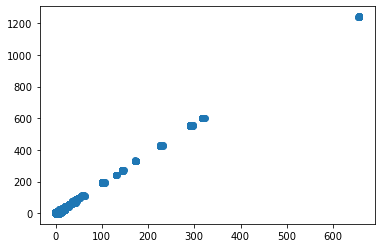

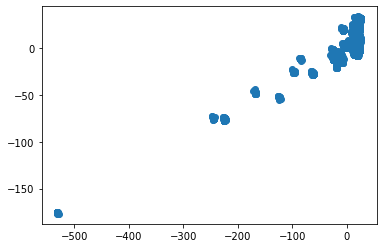

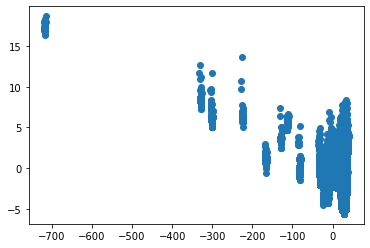

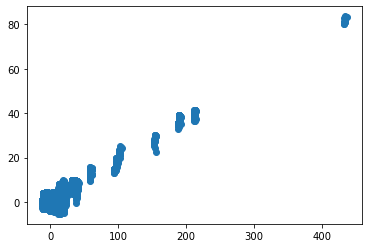

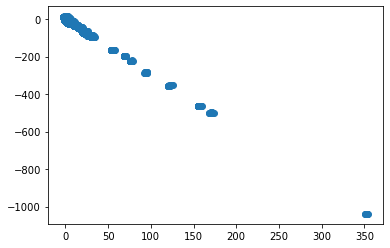

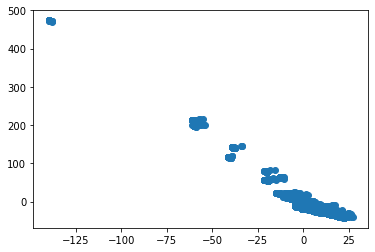

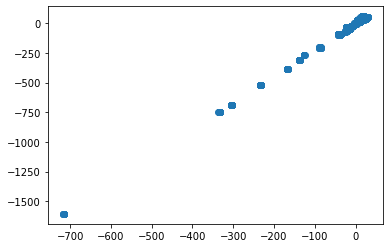

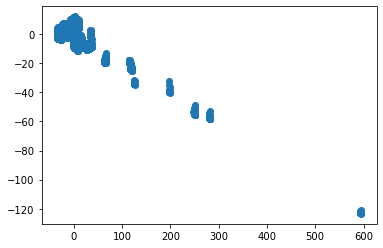

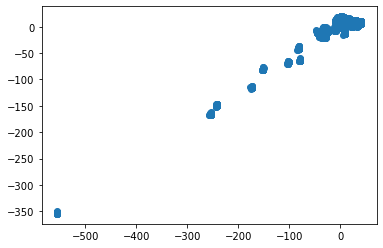

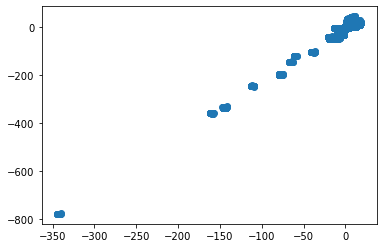

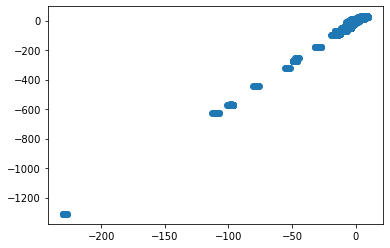

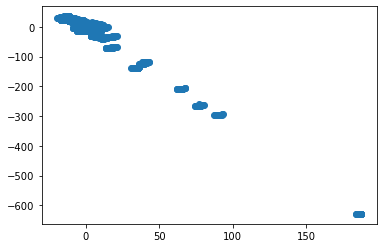

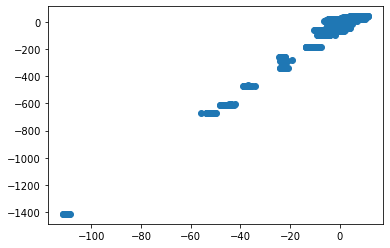

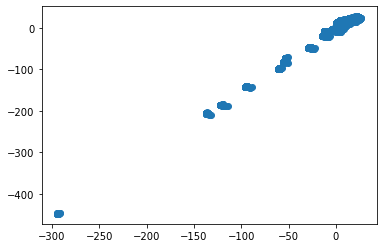

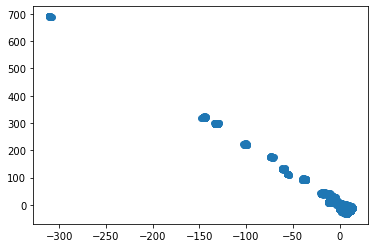

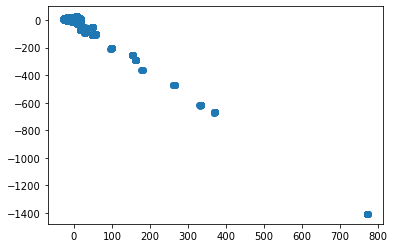

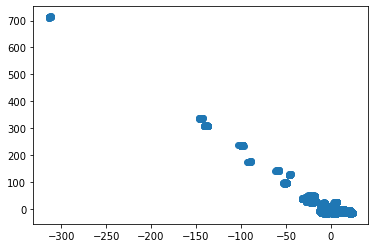

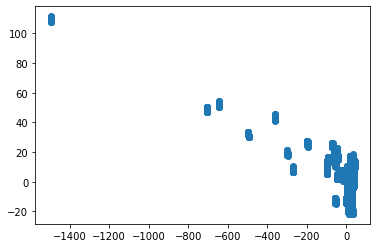

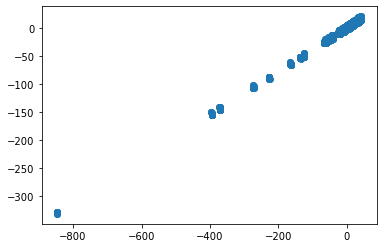

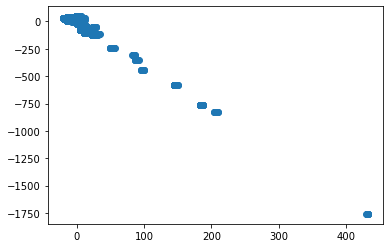

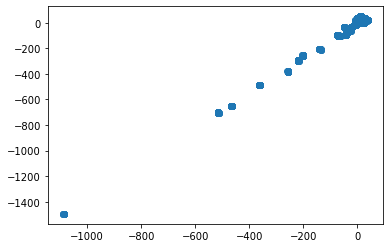

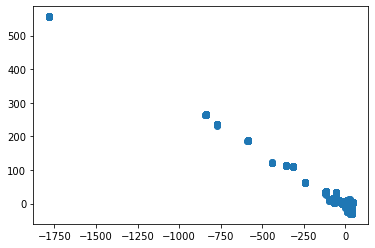

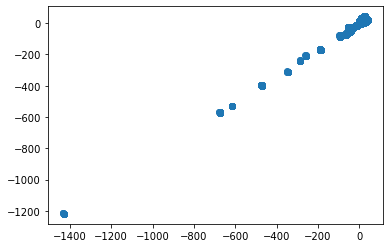

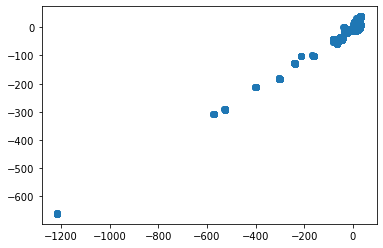

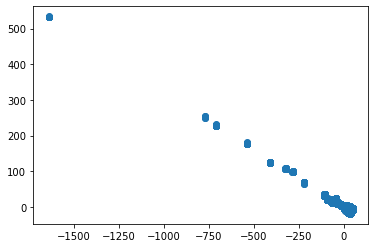

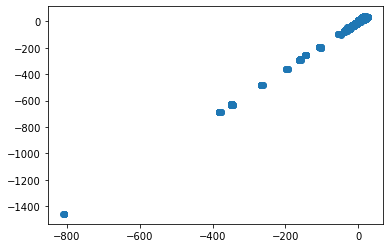

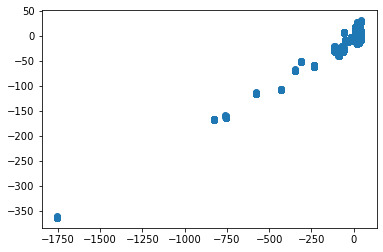

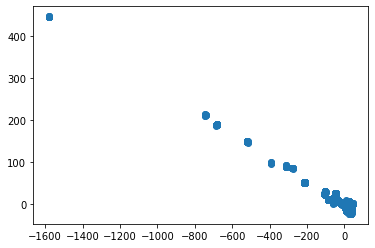

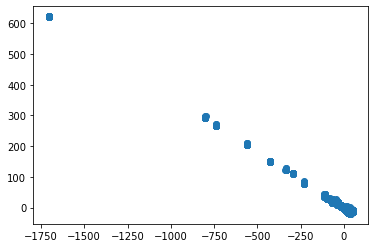

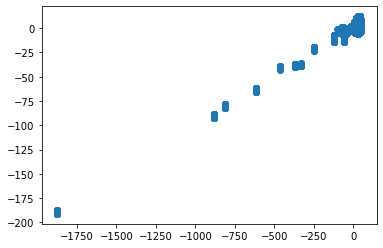

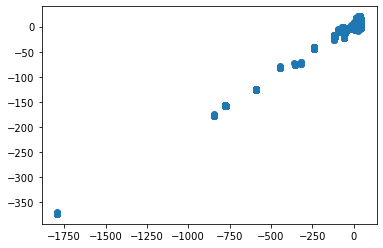

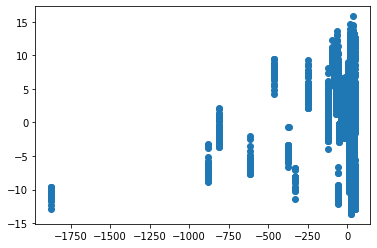

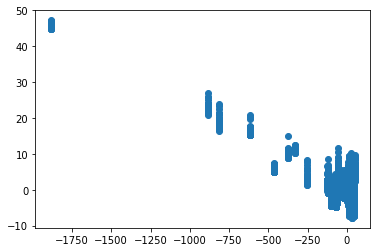

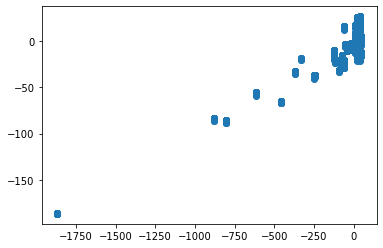

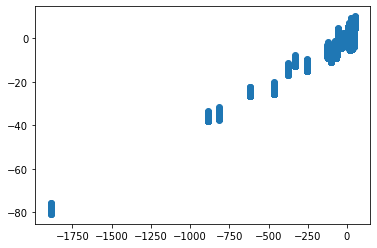

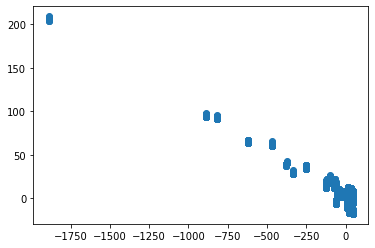

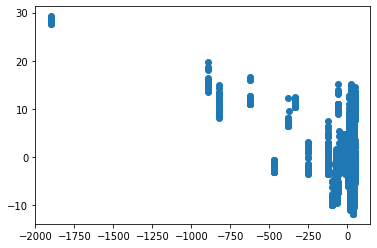

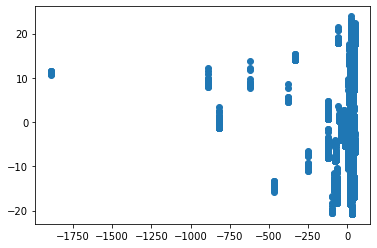

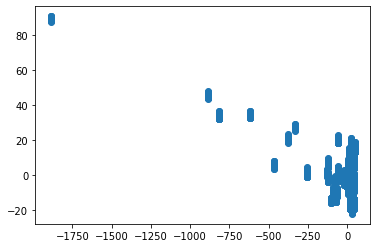

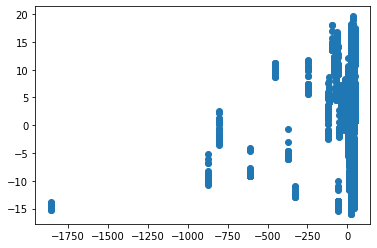

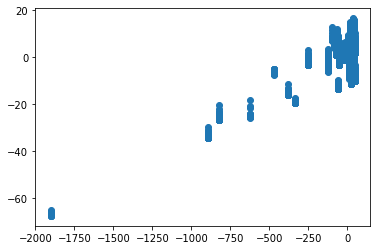

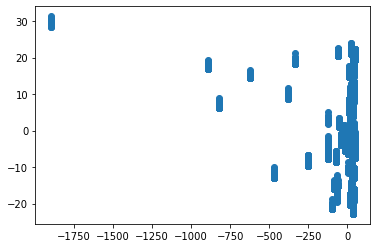

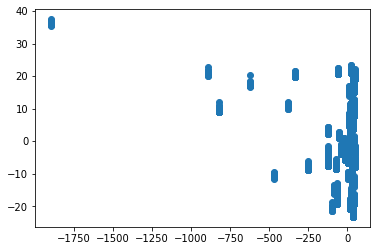

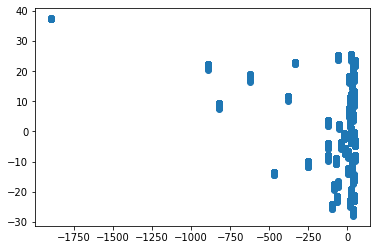

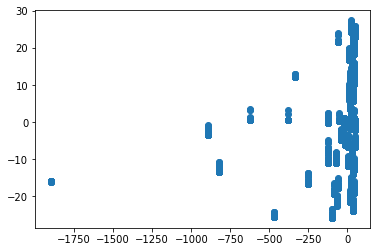

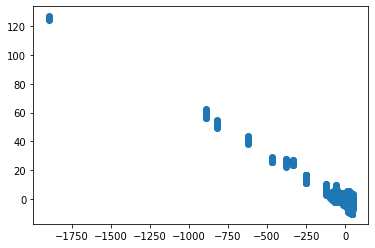

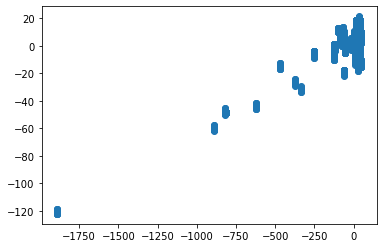

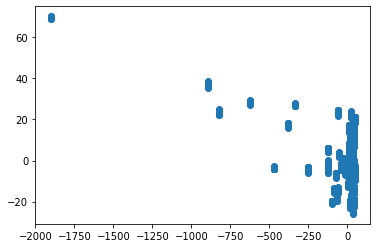

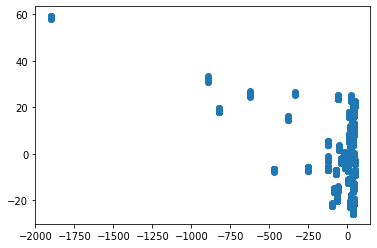

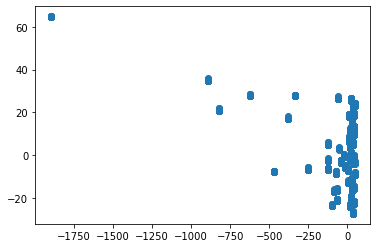

In [20]:
epsilons = np.logspace(-2, 2, 50)
accuracy = []
for epsilon in epsilons:

    dp_pca = dpm.PCA(n_components=5, epsilon=epsilon)
    tX_train = dp_pca.fit_transform(X_train[1:15000,])
    plt.figure()
    ax = plt.subplot(111)
    ax.scatter(tX_train[:,0],tX_train[:,1] )
    tX_test = dp_pca.transform(X_test)

    clf_dfPCA = LogisticRegression(random_state = 0, max_iter = 200).fit(tX_train, y_train[1:15000])
    accuracy.append(clf_dfPCA.score(tX_test, y_test))



In [21]:
accuracy

[0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8012107184189442,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8012107184189442,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950057866,
 0.8011216950

In [19]:
clf_dfPCA = LogisticRegression(random_state = 0, max_iter = 200).fit(tX_train, y_train[1:15000])
print(f"Performance on training data {clf_dfPCA.score(tX_train, y_train[1:15000])}")
print(f"Performance on test data {clf_dfPCA.score(tX_test, y_test)}")

Performance on training data 0.7969864657643843
Performance on test data 0.8010326715926288
